## Loading FooDD Dataset

Import the dependencies for the notebook:

In [11]:
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import sys

## Locate File Path

Here I set paths to the dataset and individual folders containing all of my images.

In [12]:
# Absolute path to the dataset
FooDD_path = "/Users/harrymckinney/Desktop/Capstone/FooDD"

In [13]:
# List of folders in the dataset
food_folders = glob.glob(os.path.join(FooDD_path, '*'))

# check the folder names
#food_folders

## Resize Images and Convert to NumPy Arrays

This is the code I use to resize to 224x224. This is necessary for pre-trained model architectures like EfficientNet that expect inputs arrays of a certain size. 

Here I am assuming for a baseline model that I will use something like EfficientNet B0 that expects an array of (224,224,3)

In [14]:
def convert_with_resize(img_path, new_width=224, new_height=224):

    orig_img = Image.open(img_path)   
    new_size = (new_width, new_height)
    
    # Location of the cropping center 
    centering = (0.25, 0.5)

    # Resize while maintaining the original aspect ratio (recommended in Tensorflow Transfer learning Guide)
    resized_img = ImageOps.fit(orig_img, new_size, centering=centering)

    # Convert resized image to NumPy array
    resized_img_arr = np.asarray(resized_img)

    return resized_img_arr

Here I am testing the resizing function with a random file path. 

(1520, 2688, 3)

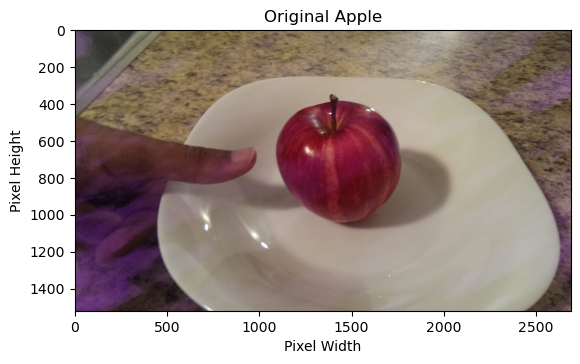

In [46]:
path = "/Users/harrymckinney/Desktop/Capstone/FooDD/Apple/1-Samsung-S4-Light Environment/1 (66).jpg"
img = Image.open(path) 
plt.title("Original Apple")
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.imshow(img)
np.asarray(img).shape

Text(0, 0.5, 'Pixel Height')

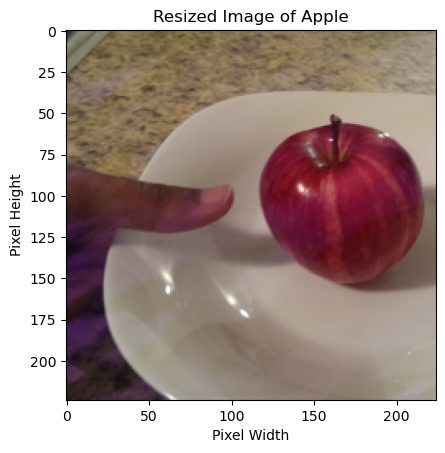

In [43]:
plt.imshow(convert_with_resize(path))
plt.title("Resized Image of Apple")
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")

## Convert Entire Class Folder to NumPy Arrays

This function is used to go through every folder and extract the arrays for each image along with the class label. It uses the previously defined convert_with_resize function that specifies the cropping and resampling filter. 

In [16]:
def ims_to_arrs(item):
    
    '''
    Inputs: item - a list of absolute paths to the images for an item.
            
    Outputs: food_arrs - a list of NumPy arrays for all images for an item.
             item_name - a string for the name of the item.
    '''
    
    #Initialize list for image file paths
    food_paths = []

    #Get the name of the item
    item_name = item.split("/")[-1]

    #Get paths of files in folder
    food_paths = glob.glob(os.path.join(item, '**',"*.[jJ][pP][gG]"), recursive=True)

    for path in food_paths:

        try:
            #Call the function that makes an array of resized (smaller) image
            img_arr = convert_with_resize(path,224)
            food_arrs.append(img_arr)
            
        #don't want to error out just give me the corrupted file path if its bad
        except Exception as e:
            print(f"Error processing image from {path}: {e}")

    print(f"Retrieved all images from {item_name} folder.")
        
    return food_arrs, item_name

This is the loop that calls `ims_to_arrs` function for each folder:

In [17]:
food_ims = dict()

for folder in food_folders:
    
    #Initialize empty list to store all the arrays (images) for an item
    food_arrs = []
    
    #Call function to convert images from a folder into a list of arrays
    food_arrs, item_name = ims_to_arrs(folder)
    
    #Assign the list of arrays to a dictionary with the key as the item name
    food_ims[item_name] = food_arrs
    
    #Update status for long runtimes
    print(f"Saved all images for {item_name} into food_ims dictionary.")
    
    #Clear the arrays and name for the next loop to free up memory
    del food_arrs, item_name
    

Retrieved all images from Apple folder.
Saved all images for Apple into food_ims dictionary.
Retrieved all images from Egg folder.
Saved all images for Egg into food_ims dictionary.
Retrieved all images from Grape & Apple folder.
Saved all images for Grape & Apple into food_ims dictionary.
Retrieved all images from Onion folder.
Saved all images for Onion into food_ims dictionary.
Retrieved all images from Bean folder.
Saved all images for Bean into food_ims dictionary.
Retrieved all images from Mixed folder.
Saved all images for Mixed into food_ims dictionary.
Retrieved all images from Cucumber folder.
Saved all images for Cucumber into food_ims dictionary.
Retrieved all images from Cheese folder.
Saved all images for Cheese into food_ims dictionary.
Retrieved all images from Watermelon folder.
Saved all images for Watermelon into food_ims dictionary.
Retrieved all images from Pasta folder.
Saved all images for Pasta into food_ims dictionary.
Retrieved all images from Net images folde

## Clean Data Labels

Here I want to rename some of the classes and get rid of the multi-object classes to create a dataset of unique classes only.

Rename the following classes:

In [18]:
food_ims["Beans"] = food_ims["Bean"]
del food_ims["Bean"]

In [19]:
food_ims["Grapes"] = food_ims["Grape"]
del food_ims["Grape"]

In [20]:
food_ims["Kiwi"] = food_ims["Qiwi"]
del food_ims["Qiwi"]

Drop these classes for now:

In [21]:
del food_ims["Grape & Apple"], food_ims["Mixed"], food_ims["Net images"], food_ims["sauce"]

The remaining classes are these:

In [22]:
food_ims.keys()

dict_keys(['Apple', 'Egg', 'Onion', 'Cucumber', 'Cheese', 'Watermelon', 'Pasta', 'Bread', 'Banana', 'Pepper', 'Tomato', 'Orange', 'Carrot', 'Beans', 'Grapes', 'Kiwi'])

## Verifying Image Conversion to Arrays

I want to confirm that I have loaded and cleaned the data properly: 

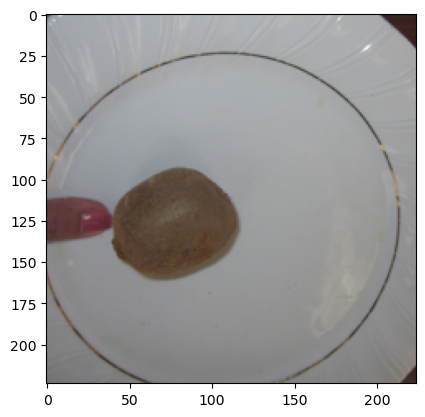

In [23]:
#Check a random image from the loaded dataset
inspect_img = food_ims["Kiwi"][42]
plt.imshow(inspect_img)

In [24]:
inspect_img.shape

(224, 224, 3)

## Save the Arrays to Quickly Load

Here I am going to pickle the file and save it to my capstone repository so that I can easily load the data for EDA, more preprocessing and modelling. 

In [25]:
save_path = "/Users/harrymckinney/Desktop/SavedArrays/FinalSet.npz"

In [26]:
np.savez(save_path, **food_ims)

## Verify the Saved Arrays 

This is the process I will use later on in the other notebooks. I'm just going to verify that I did the save correctly and that everything functions properly.

In [27]:
loaded_data = np.load(save_path, allow_pickle=True)
loaded_data

In [28]:
food_ims_loaded = dict()

for key in loaded_data.keys():
    
        food_ims_loaded[key] = loaded_data[key]
        print(f"Successfully loaded {key} into dictionary")

Successfully loaded Apple into dictionary
Successfully loaded Egg into dictionary
Successfully loaded Onion into dictionary
Successfully loaded Cucumber into dictionary
Successfully loaded Cheese into dictionary
Successfully loaded Watermelon into dictionary
Successfully loaded Pasta into dictionary
Successfully loaded Bread into dictionary
Successfully loaded Banana into dictionary
Successfully loaded Pepper into dictionary
Successfully loaded Tomato into dictionary
Successfully loaded Orange into dictionary
Successfully loaded Carrot into dictionary
Successfully loaded Beans into dictionary
Successfully loaded Grapes into dictionary
Successfully loaded Kiwi into dictionary


One last check to see that a random image is fine:

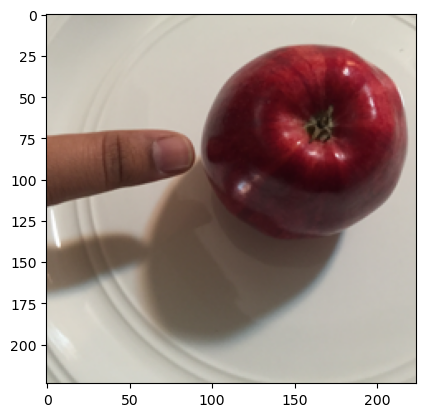

In [29]:
plt.imshow(food_ims_loaded["Apple"][0])

In [30]:
food_ims_loaded["Apple"].shape

(435, 224, 224, 3)